In [3]:
import warnings
import os
import sys

warnings.filterwarnings('ignore')
current_dir = %pwd

parent_dir = os.path.abspath(os.path.join(current_dir, '../..'))

sys.path.append(parent_dir)

In [1]:
from src.main.models.logistic import Logistic
from src.main.utilities.utils import get_dataset, split_train_val_test
from src.main.pipeline.functions import stop_words_removal, stemming, select_features, tfidf_vectorizer, count_vectorizer, tfidf_transformer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
# define model and pipeline
logistic = Logistic(verbose=False, multi_class="multinomial", n_jobs=-1, max_iter=1000)
logistic.pipeline = [stop_words_removal, stemming, count_vectorizer]

# import dataset and apply pipeline
inputs, targets = get_dataset()
inputs = logistic.run_pipeline(inputs, save = True)

inputs = select_features(inputs, targets, k=10000)
inputs = tfidf_transformer(inputs)

In [3]:
# stratified train test split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42, stratify=targets)

In [4]:
# model training 
search = logistic.grid_search(x_train, y_train, n_iter=50)
search.best_estimator_
# logistic.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/fabriziodecastelli/anaconda3/envs/HLT/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fabriziodecastelli/anaconda3/envs/HLT/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fabriziodecastelli/anaconda3/envs/HLT/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fabriziodecastelli/anaconda3/envs/HLT/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/fabriziodecastelli/anaconda3/envs/HLT/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means

LogisticRegression(C=2.5, class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', n_jobs=-1, verbose=False)

In [5]:
search.cv_results_
search.best_score_

0.8535743157408475

In [6]:
from sklearn.metrics import classification_report
from src.main.utilities import plotting

y_pred = logistic.predict(x_test)
print(classification_report(y_test, y_pred))
#results = plotting.compute_performance(y_test, y_pred)
#plotting.print_performance(results)


               precision    recall  f1-score   support

Entertainment       0.79      0.79      0.79      3827
         Life       0.93      0.91      0.92      8452
     Politics       0.92      0.88      0.90      6381
       Sports       0.71      0.85      0.77       873
       Voices       0.64      0.73      0.68      2115

     accuracy                           0.86     21648
    macro avg       0.80      0.83      0.81     21648
 weighted avg       0.86      0.86      0.86     21648



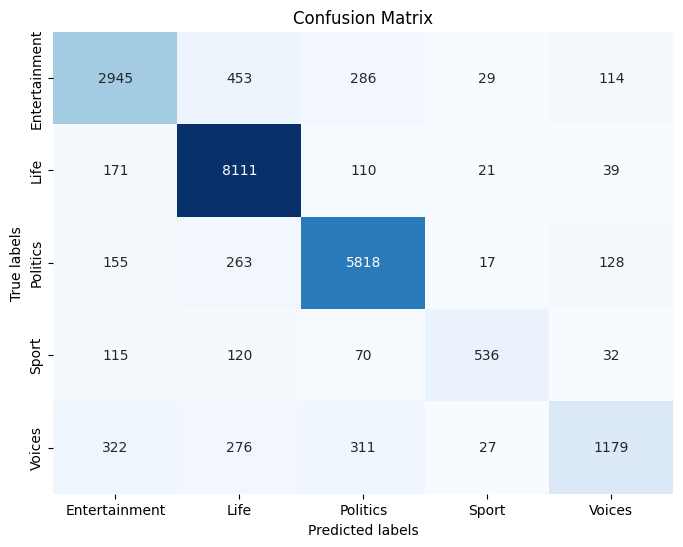

In [34]:
plotting.plot_confusion_matrix(y_test, y_pred)

In [ ]:
#plotting.plot_performance(results)